Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-66-c1dbd78f6ddd>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)


Displaying the original image.


array([[[ 60,  78, 118],
        [ 63,  76, 118],
        [ 53,  71, 111],
        ...,
        [  8,  33,  74],
        [  1,   3,  18],
        [ 11,  76,  80]],

       [[ 60,  78, 118],
        [ 65,  77, 119],
        [ 54,  72, 112],
        ...,
        [  0,   3,  24],
        [ 11,  60,  65],
        [ 38, 168, 168]],

       [[ 60,  78, 118],
        [ 65,  77, 119],
        [ 55,  73, 113],
        ...,
        [  7,  47,  55],
        [ 28, 162, 161],
        [ 24, 164, 165]],

       ...,

       [[ 31,  35,  64],
        [ 29,  40,  72],
        [ 30,  48,  86],
        ...,
        [  1,   9,  12],
        [  7,  13,  29],
        [ 29,  37,  50]],

       [[ 31,  35,  62],
        [ 28,  39,  71],
        [ 29,  47,  85],
        ...,
        [  9,  17,  19],
        [ 35,  47,  63],
        [ 47,  64,  80]],

       [[ 31,  35,  62],
        [ 28,  39,  71],
        [ 29,  47,  85],
        ...,
        [  4,  21,  28],
        [ 45,  65,  92],
        [ 27,  54,  84]]], dtype=uint8)
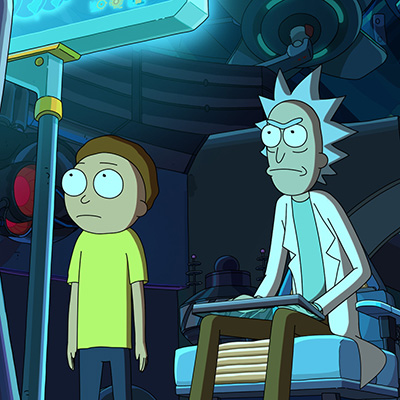

In [66]:
#Mounting google drive with googl colab
!pip install imageio
from google.colab import drive
drive.mount('/content/drive')

#importing libraries necessary to handle the imported image properly
import imageio
from IPython.display import display
import numpy as np

def load_image(image_path):
    img = imageio.imread(image_path)
    return img

# Load the image
image_path = '/content/drive/MyDrive/Spring 2024/Linear algebra/Final Project/rick_morty.jpg'
img = load_image(image_path)
print("Displaying the original image.")
display(img)


In [ ]:
#Function for different features

#Crop
def crop_image(image, start_row, start_col, end_row, end_col):
    return image[start_row:end_row, start_col:end_col]

#Resize
def resize_image(image, new_height, new_width):
    height_ratio = len(image) / new_height
    width_ratio = len(image[0]) / new_width
    resized_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    for i in range(new_height):
        for j in range(new_width):
            resized_image[i, j] = image[int(i * height_ratio), int(j * width_ratio)]
    return resized_image

#Rotate
def rotate_image(image, angle):
    if angle == 90:
        return np.rot90(image)
    elif angle == 180:
        return np.rot90(image, 2)
    elif angle == 270:
        return np.rot90(image, 3)
    return image


Cropped out Rick!!


array([[[ 16,  87, 109],
        [ 18,  86, 109],
        [ 17,  85, 108],
        ...,
        [  1,  14,  31],
        [  1,  14,  30],
        [  1,  15,  28]],

       [[ 18,  86, 109],
        [ 18,  84, 108],
        [ 17,  83, 107],
        ...,
        [  1,  14,  30],
        [  1,  14,  30],
        [  0,  15,  30]],

       [[ 17,  81, 106],
        [ 16,  80, 105],
        [ 15,  80, 102],
        ...,
        [  2,  14,  30],
        [  0,  15,  30],
        [  0,  16,  31]],

       ...,

       [[ 21,  35,  46],
        [ 21,  35,  46],
        [ 21,  35,  46],
        ...,
        [ 14,  20,  36],
        [ 17,  23,  39],
        [ 19,  26,  44]],

       [[ 21,  35,  46],
        [ 21,  35,  46],
        [ 21,  35,  46],
        ...,
        [ 17,  21,  33],
        [ 17,  21,  33],
        [ 17,  21,  33]],

       [[ 21,  35,  46],
        [ 21,  35,  46],
        [ 21,  35,  46],
        ...,
        [ 17,  21,  33],
        [ 17,  21,  33],
        [ 17,  21,  33]]], dtype=uint8)
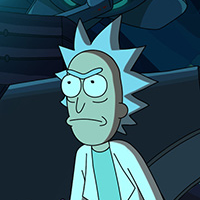

In [71]:
# Apply the crop function
#Use specific row and col number as arguments to get specific starting and ending pixel

#Here specific number were used to crop out rick
start_row = 50
start_col = 200
end_row = 250
end_col = 400

cropped_img = crop_image(img, start_row, start_col, end_row, end_col)
print("Cropped out Rick!!")
display(cropped_img)




array([[[ 60,  78, 118],
        [ 53,  71, 111],
        [102, 137, 167],
        ...,
        [  0,  43,  76],
        [  4,  39,  69],
        [  1,   3,  18]],

       [[ 60,  78, 118],
        [ 55,  73, 113],
        [ 95, 130, 160],
        ...,
        [  4,  33,  77],
        [  4,   1,  22],
        [ 28, 162, 161]],

       [[ 62,  77, 118],
        [ 58,  76, 116],
        [ 93, 128, 158],
        ...,
        [  1,  32,  60],
        [ 32, 115, 119],
        [ 32, 135, 140]],

       ...,

       [[ 28,  34,  66],
        [ 30,  50,  87],
        [ 29,  48,  88],
        ...,
        [ 35,  58,  92],
        [ 41,  63, 100],
        [ 10,  15,  35]],

       [[ 30,  35,  64],
        [ 30,  48,  86],
        [ 29,  48,  88],
        ...,
        [ 15,  31,  46],
        [ 33,  47,  84],
        [  5,  17,  31]],

       [[ 31,  35,  62],
        [ 29,  47,  85],
        [ 29,  48,  90],
        ...,
        [ 17,  33,  49],
        [ 25,  33,  44],
        [ 35,  47,  63]]], dtype=uint8)
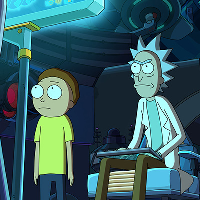

In [72]:
# Apply the resize function
#Use specific number as arguments to get the preferred new height and width

#Here new height and width were used as 200
height = 200
width = 200

resized_img = resize_image(img, height, width)
display(resized_img)

array([[[ 27,  54,  84],
        [ 45,  65,  92],
        [  4,  21,  28],
        ...,
        [ 29,  47,  85],
        [ 28,  39,  71],
        [ 31,  35,  62]],

       [[ 47,  64,  80],
        [ 35,  47,  63],
        [  9,  17,  19],
        ...,
        [ 29,  47,  85],
        [ 28,  39,  71],
        [ 31,  35,  62]],

       [[ 29,  37,  50],
        [  7,  13,  29],
        [  1,   9,  12],
        ...,
        [ 30,  48,  86],
        [ 29,  40,  72],
        [ 31,  35,  64]],

       ...,

       [[ 24, 164, 165],
        [ 28, 162, 161],
        [  7,  47,  55],
        ...,
        [ 55,  73, 113],
        [ 65,  77, 119],
        [ 60,  78, 118]],

       [[ 38, 168, 168],
        [ 11,  60,  65],
        [  0,   3,  24],
        ...,
        [ 54,  72, 112],
        [ 65,  77, 119],
        [ 60,  78, 118]],

       [[ 11,  76,  80],
        [  1,   3,  18],
        [  8,  33,  74],
        ...,
        [ 53,  71, 111],
        [ 63,  76, 118],
        [ 60,  78, 118]]], dtype=uint8)
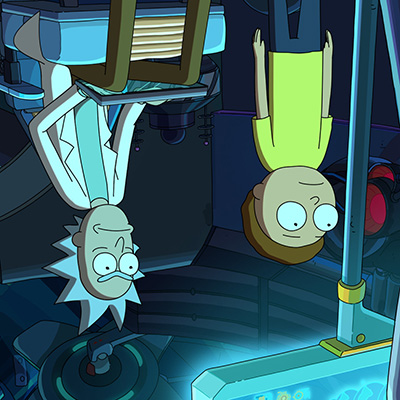

In [73]:
# Apply the rotate function
#Use (90,180,270,360...) as parameter to rotate the image in that angle

#here 180 was used as the desired angle
angle = 180

rotated_img = rotate_image(img, angle)
display(rotated_img)